In [8]:
##unpack .tgz file
#import tarfile
#tar = tarfile.open("languageID.tgz", "r:gz")
#tar.extractall()  ##input data is extracted to the "languageID" folder

**Problem 2 - Language Identification with Naive Bayes**

In [1]:

import pandas as pd
import numpy as np
import os
import math
import random
import matplotlib.pyplot as plt

*Important functions*

In [5]:
##creating input datasets
def get_input_data(file_patterns, input_data_path = "languageID/"):
    X = []
    Y = []
    for file_pattern in file_patterns:
        for file in os.listdir(input_data_path): ##for each file
            if file_pattern in file: ##if the file name contains the pattern
                Y.append(file[0]) ##extracting the language label from the first charac of file name
                #loading string data from text files
                file_data = open(input_data_path + file, "r").read()
                x_i =[]
                for i in file_data:
                    if i.isalpha() or i==" ": ##extracting only alphabets and spaces
                        x_i.append(i)
                
                X.append(x_i)
    return X, Y

In [6]:
##calculating conditional probabilities (for pre-defined a_s and c_k)
def conditional_prob(X, Y,a_s, c_k, alpha, S):
    numerator = 0
    for i in range(len(X)):
        for j in range(len(X[i])):
            if X[i][j]==a_s and Y[i]==c_k:
                numerator= numerator + 1
    updated_numerator = numerator + alpha

    denominator = 0
    """for i in range(len(X)):
        for j in range(len(X[i])):
            if Y[i]==c_k:
                denominator += 1 */ """
    for b_s in S:
        for i in range(len(X)):
            for j in range(len(X[i])):
                if X[i][j]==b_s and Y[i]==c_k:
                    denominator = denominator + 1
    updated_denominator = denominator + alpha*len(S)

    return updated_numerator/updated_denominator



In [7]:
##calculating prior probabilities (for pre-defined c_k)
def prior_prob(Y, c_k, alpha, L):
    numerator = 0
    for i in range(len(Y)):
        if Y[i]==c_k:
            numerator = numerator + 1
    updated_numerator = numerator + alpha

    updated_denominator = len(Y) + alpha*len(L)

    #print("updated_numerator: ", updated_numerator, "updated_denominator: ", updated_denominator)

    return updated_numerator/updated_denominator

In [8]:
##bag of charac count vector (returns bag of charac counts as the input data, instead of total # characs )
def bag_of_characs_count(file_patterns, vocabulary, input_data_path = "languageID/"):
    X = []
    Y = []
    for file_pattern in file_patterns:
        for file in os.listdir(input_data_path): ##for each file
            if file_pattern in file: ##if the file name contains the pattern
                Y.append(file[0]) ##extracting the language label from the first charac of file name
                #loading string data from text files
                file_data = open(input_data_path + file, "r").read()
                x_i =[]
                for i in vocabulary:
                    x_i.append(file_data.count(i))
                X.append(x_i)
    return X, Y


**2.1 prior probabilities using 0.txt to 9.txt**

In [10]:
file_patterns_2_1 = ['e0.txt', 'e1.txt', 'e2.txt', 'e3.txt', 'e4.txt', 'e5.txt', 'e6.txt', 'e7.txt', 'e8.txt', 'e9.txt', 'j0.txt', 'j1.txt', 'j2.txt', 'j3.txt', 'j4.txt', 'j5.txt', 'j6.txt', 'j7.txt', 'j8.txt', 'j9.txt', 's0.txt', 's1.txt', 's2.txt', 's3.txt', 's4.txt', 's5.txt', 's6.txt', 's7.txt', 's8.txt', 's9.txt']

X_2_1, Y_2_1 = get_input_data(file_patterns_2_1)

list_of_labels = list(set(Y_2_1))

for l in list_of_labels:
    print("Prior probability of ", l, " is ", prior_prob(Y_2_1, l, 1/2, list_of_labels))


Prior probability of  s  is  0.3333333333333333
Prior probability of  e  is  0.3333333333333333
Prior probability of  j  is  0.3333333333333333


In [13]:
#list with all the alphabets manually
import string
list_of_charcs =list(string.ascii_lowercase)
list_of_charcs.append(" ")
print(list_of_charcs)
len(list_of_charcs)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']


27

**2.2 & 2.3 class conditional probability (multinomial parameter)**

In [15]:
parameter_vector_english = []
for a_s in list_of_charcs:
    parameter_vector_english.append(conditional_prob(X_2_1, Y_2_1, a_s, "e", 1/2, list_of_charcs))

print("Parameter vector for English: ", parameter_vector_english)

parameter_vector_japanese = []
for a_s in list_of_charcs:
    parameter_vector_japanese.append(conditional_prob(X_2_1, Y_2_1, a_s, "j", 1/2, list_of_charcs))

print("Parameter vector for Japanese: ", parameter_vector_japanese)

parameter_vector_spanish = []
for a_s in list_of_charcs:
    parameter_vector_spanish.append(conditional_prob(X_2_1, Y_2_1, a_s, "s", 1/2, list_of_charcs))

print("Parameter vector for Spanish: ", parameter_vector_spanish)

Parameter vector for English:  [0.0601685114819098, 0.011134974392863043, 0.021509995043779945, 0.021972575582355856, 0.1053692383941847, 0.018932760614571286, 0.017478936064761277, 0.047216256401784236, 0.055410540227986124, 0.001420783082768875, 0.0037336857756484387, 0.028977366595076822, 0.020518751032545846, 0.057921691723112505, 0.06446390219725756, 0.01675202378985627, 0.0005617049396993227, 0.053824549810011564, 0.06618205848339666, 0.08012555757475633, 0.026664463902197257, 0.009284652238559392, 0.015496448042293078, 0.001156451346439782, 0.013844374690236246, 0.0006277878737815959, 0.1792499586981662]
Parameter vector for Japanese:  [0.1317656102589189, 0.010866906600510151, 0.005485866033054963, 0.01722631818022992, 0.06020475907613823, 0.003878542227191726, 0.014011670568503443, 0.03176211607673224, 0.09703343932352633, 0.0023411020650616725, 0.05740941332681086, 0.001432614696530277, 0.03979873510604843, 0.05671057688947902, 0.09116321324993885, 0.0008735455466648031, 0.00

In [16]:
print(len(list_of_charcs))
print(list_of_charcs)

27
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']


**2.4 bag-of-characters (not words) count vector**

In [19]:
file_patterns_2_4 = ["e10.txt"]
X_2_4, Y_2_4 =  bag_of_characs_count(file_patterns_2_4, list_of_charcs) ##here vocabulary is the list of all the characs (27)
print("bag of characters count vector for e10.txt: ", X_2_4[0])

bag of characters count vector for e10.txt:  [164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]


**2.5 likelihood of X given Y**

In [20]:
## calculate likelihood for each language
def log_likelihood(counts_vec, parameter_vector_english, parameter_vector_japanese, parameter_vector_spanish):
    log_likelihood_english = 0
    log_likelihood_japanese = 0
    log_likelihood_spanish = 0
    for i in range(len(counts_vec)):##as length of counts_vec is # of characs/parameters (d=27)
        log_likelihood_english = log_likelihood_english + counts_vec[i]*math.log(parameter_vector_english[i])
        log_likelihood_japanese = log_likelihood_japanese + counts_vec[i]*math.log(parameter_vector_japanese[i])
        log_likelihood_spanish = log_likelihood_spanish+ counts_vec[i]*math.log(parameter_vector_spanish[i])

    return log_likelihood_english, log_likelihood_japanese, log_likelihood_spanish

In [24]:
ll_2_4_e, ll_2_4_j, ll_2_4_s  = log_likelihood(X_2_4[0], parameter_vector_english, parameter_vector_japanese, parameter_vector_spanish)
print("log(p(x|y=e)): ", ll_2_4_e)
print("log(p(x|y=j)): ", ll_2_4_j)
print("log(p(x|y=s)): ", ll_2_4_s)
print("p(x|y=e): ", math.exp(ll_2_4_e))
print("p(x|y=j): ", math.exp(ll_2_4_j))
print("p(x|y=s): ", math.exp(ll_2_4_s))

log(p(x|y=e)):  -7841.865447060635
log(p(x|y=j)):  -8771.433079075032
log(p(x|y=s)):  -8467.282044010557
p(x|y=e):  0.0
p(x|y=j):  0.0
p(x|y=s):  0.0


In [80]:
ll_2_4_s

-8467.282044010557

**2.6 posterior probability P(Y|X)**

In [26]:
##using bayes rule to calculate posterior probabilities (p(y|x) = p(x|y)*p(y)/p(x) ~ p(x|y)*p(y) since p(x) is same for all y)
###Therefore, log(p(y|x)) = log(p(x|y)) + log(p(y))
def log_posterior_prob_calc(loglikeli, prior_prob):
    return loglikeli + math.log(prior_prob)


In [29]:
#p(y=e|x)
log_posterior_prob_e = log_posterior_prob_calc(ll_2_4_e, prior_prob(Y_2_1, "e", 1/2, list_of_labels))
print("log(p(y=e|x)): ", log_posterior_prob_e)
#print("p(y=e|x): ", math.exp(log_posterior_prob_e))

#p(y=j|x)
log_posterior_prob_j = log_posterior_prob_calc(ll_2_4_j, prior_prob(Y_2_1, "j", 1/2, list_of_labels))
print("log(p(y=j|x)): ", log_posterior_prob_j)
#print("p(y=j|x): ", math.exp(log_posterior_prob_j))

#p(y=s|x)
log_posterior_prob_s = log_posterior_prob_calc(ll_2_4_s, prior_prob(Y_2_1, "s", 1/2, list_of_labels))
print("log(p(y=s|x)): ", log_posterior_prob_s)
#print("p(y=s|x): ", math.exp(log_posterior_prob_s))

#predicting the language
def predict_language(log_posterior_prob_e, log_posterior_prob_j, log_posterior_prob_s): ##order should be e, j, s
    if log_posterior_prob_e >= log_posterior_prob_j and log_posterior_prob_e >= log_posterior_prob_s:
        return "e"
    elif log_posterior_prob_j >= log_posterior_prob_e and log_posterior_prob_j >= log_posterior_prob_s:
        return "j"
    else:
        return "s"

print("Predicted language: ", predict_language(log_posterior_prob_e, log_posterior_prob_j, log_posterior_prob_s))

log(p(y=e|x)):  -7842.964059349303
log(p(y=j|x)):  -8772.5316913637
log(p(y=s|x)):  -8468.380656299225
Predicted language:  e


**2.7 confusion matrix (test files - 10.txt to 19.txt)**

In [31]:
## function for confusion matrix
def confusion_matrix_calc(predicted_labels, actual_labels):
    confusion_matrix = np.zeros((3,3))
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == "e" and actual_labels[i] == "e":
            confusion_matrix[0,0] = confusion_matrix[0,0] + 1
        elif predicted_labels[i] == "e" and actual_labels[i] == "j":
            confusion_matrix[0,1] = confusion_matrix[0,1] + 1
        elif predicted_labels[i] == "e" and actual_labels[i] == "s":
            confusion_matrix[0,2] = confusion_matrix[0,2] + 1
        elif predicted_labels[i] == "j" and actual_labels[i] == "e":
            confusion_matrix[1,0] = confusion_matrix[1,0] + 1
        elif predicted_labels[i] == "j" and actual_labels[i] == "j":
            confusion_matrix[1,1] = confusion_matrix[1,1] + 1
        elif predicted_labels[i] == "j" and actual_labels[i] == "s":
            confusion_matrix[1,2] = confusion_matrix[1,2] + 1
        elif predicted_labels[i] == "s" and actual_labels[i] == "e":
            confusion_matrix[2,0] = confusion_matrix[2,0] + 1
        elif predicted_labels[i] == "s" and actual_labels[i] == "j":
            confusion_matrix[2,1] = confusion_matrix[2,1] + 1
        elif predicted_labels[i] == "s" and actual_labels[i] == "s":
            confusion_matrix[2,2] = confusion_matrix[2,2] + 1
    return confusion_matrix

In [33]:
file_patterns_2_7 = ('e10.txt', 'e11.txt', 'e12.txt', 'e13.txt', 'e14.txt', 'e15.txt', 'e16.txt', 'e17.txt', 'e18.txt', 'e19.txt', 'j10.txt', 'j11.txt', 'j12.txt', 'j13.txt', 'j14.txt', 'j15.txt', 'j16.txt', 'j17.txt', 'j18.txt', 'j19.txt', 's10.txt', 's11.txt', 's12.txt', 's13.txt', 's14.txt', 's15.txt', 's16.txt', 's17.txt', 's18.txt', 's19.txt')

X_2_7_test, Y_2_7_test_true = bag_of_characs_count(file_patterns_2_7, list_of_charcs) ##here vocabulary is the list of all the characs (27)


In [36]:
##predicting the language for test data
Y_2_7_test_pred = []
for t in range(len(X_2_7_test)):
    ll_2_7_e, ll_2_7_j, ll_2_7_s  = log_likelihood(X_2_7_test[t], parameter_vector_english, parameter_vector_japanese, parameter_vector_spanish)
    log_posterior_prob_e_2_7 = log_posterior_prob_calc(ll_2_7_e, prior_prob(Y_2_1, "e", 1/2, list_of_labels))
    log_posterior_prob_j_2_7 = log_posterior_prob_calc(ll_2_7_j, prior_prob(Y_2_1, "j", 1/2, list_of_labels))
    log_posterior_prob_s_2_7 = log_posterior_prob_calc(ll_2_7_s, prior_prob(Y_2_1, "s", 1/2, list_of_labels))

    Y_2_7_test_pred.append(predict_language(log_posterior_prob_e_2_7, log_posterior_prob_j_2_7, log_posterior_prob_s_2_7))


##confusion matrix
confusion_matrix_calc(Y_2_7_test_pred, Y_2_7_test_true)


array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])

**2.8 Effect of Order suffle - e10**

In [37]:
test_document = "j19.txt"
file_data_2_8 = open("languageID/" + test_document, "r").read()
##suffle the string
list_2_8 = list(file_data_2_8)
random.shuffle(list_2_8)
shuffled_file_data_2_8 = ''.join(list_2_8)

#print(shuffled_file_data_2_8)

x_i_2_8 =[]
for i in list_of_charcs:
    x_i_2_8.append(shuffled_file_data_2_8.count(i))

In [38]:
##prediction for shuffled data
ll_2_8_e, ll_2_8_j, ll_2_8_s  = log_likelihood(x_i_2_8, parameter_vector_english, parameter_vector_japanese, parameter_vector_spanish)
log_posterior_prob_e_2_8 = log_posterior_prob_calc(ll_2_8_e, prior_prob(Y_2_1, "e", 1/2, list_of_labels))
log_posterior_prob_j_2_8 = log_posterior_prob_calc(ll_2_8_j, prior_prob(Y_2_1, "j", 1/2, list_of_labels))
log_posterior_prob_s_2_8 = log_posterior_prob_calc(ll_2_8_s, prior_prob(Y_2_1, "s", 1/2, list_of_labels))

#print(log_posterior_prob_e_2_8, log_posterior_prob_j_2_8, log_posterior_prob_s_2_8)

print("Predicted language for shuffled test (2.8): ", predict_language(log_posterior_prob_e_2_8, log_posterior_prob_j_2_8, log_posterior_prob_s_2_8))


Predicted language for shuffled test (2.8):  j


***PROBLEM 3 NN***

*3. 1 Implementing back-propagation for a simple neural network from scratch*

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#import numpy as np

c:\Users\harsh\anaconda3\envs\3bmi771\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
def sigmoid(x): ##element wise sigmoid using pytorch
    return 1 / (1 + torch.exp(-x))

def softmax(x): ##element wise softmax using pytorch (using safe mode to avoid potential nans)
    x_max = torch.max(x, dim=1, keepdim=True)[0]
    x = x - x_max ##subtracting the max value to avoid potential nans
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True)

def forward_pass(X, W1, W2, W3): #three layer neural network with X shape (n, d), W1 shape (d1, d), W2 shape (d2, d1), W3 shape (k, d2)
    Z1 = torch.matmul(W1, X.t()) #shape (d1, n)
    H1 = sigmoid(Z1) #shape (d1, n)
    Z2 = torch.matmul(W2, H1) #shape (d2, n)
    H2 = sigmoid(Z2) #shape (d2, n)
    Z3 = torch.matmul(W3, H2) #shape (k, n)
    Y_hat = softmax(Z3) #shape (k, n)

    return Z1, H1, Z2, H2, Z3, Y_hat

def cross_entropy_loss(Y_hat, Y): #Y_hat shape (k, n), Y shape (n, k)
    return -torch.sum(Y * torch.log(Y_hat.t()+ 1e-8)) / Y.shape[0] ###added 1e-8 to avoid potential nans

def get_weight_gradients (Z1, H1, Z2, H2, Z3, Y_hat, X, W1, W2, W3, Y):
    dL_dZ3 = Y_hat - Y.t() #shape (k, n)
    dL_dW3 = torch.matmul(dL_dZ3, H2.t()) #shape (k, d2)
    dL_dH2 = torch.matmul(W3.t(), dL_dZ3) #shape (d2, n)
    dL_dZ2 = dL_dH2 * H2 * (1 - H2) #shape (d2, n)
    dL_dW2 = torch.matmul(dL_dZ2, H1.t()) #shape (d2, d1)
    dL_dH1 = torch.matmul(W2.t(), dL_dZ2) #shape (d1, n)
    dL_dZ1 = dL_dH1 * H1 * (1 - H1) #shape (d1, n)
    dL_dW1 = torch.matmul(dL_dZ1, X) #shape (d1, d)

    return dL_dW1, dL_dW2, dL_dW3

def accuray_calc(Y_hat, Y): #Y_hat shape (k, n), Y shape (n, k)
    Y_hat_t = Y_hat.t() #shape (n, k)
    Y_hat_t_max = torch.argmax(Y_hat_t, dim=1) #shape (n, )
    Y_max = torch.argmax(Y, dim=1) #shape (n, )
    return torch.sum(Y_hat_t_max == Y_max) / Y.shape[0]

def train(X, Y, W1, W2, W3, learning_rate, num_epochs, batch_size):
    val_data_size = int(X.shape[0]*0.15)
    X_val  = X[:val_data_size, :]
    Y_val  = Y[:val_data_size, :]
    X_train = X[val_data_size:, :]
    Y_train = Y[val_data_size:, :]
    best_val_acc = 0
    for epoch in range(num_epochs):
        num_batches = (X_train.shape[0] + batch_size - 1) // batch_size
        for i in range(num_batches):
            min_index = i * batch_size
            max_index = min((i+1) * batch_size, X_train.shape[0])
            X_batch  = X_train[min_index:max_index, :]
            Y_batch  = Y_train[min_index:max_index, :]

            Z1, H1, Z2, H2, Z3, Y_hat = forward_pass(X_batch, W1, W2, W3)
            dL_dW1, dL_dW2, dL_dW3 = get_weight_gradients(Z1, H1, Z2, H2, Z3, Y_hat, X_batch, W1, W2, W3, Y_batch)

            #print("dL_dW1: ", dL_dW1, "Y_hat ",Y_hat, "H2:", H2, "H1: ", H1)

            W1 = W1 - (learning_rate/Y_batch.shape[0]) * dL_dW1
            W2 = W2 - (learning_rate/Y_batch.shape[0]) * dL_dW2
            W3 = W3 - (learning_rate/Y_batch.shape[0]) * dL_dW3

        Z1, H1, Z2, H2, Z3, Y_hat = forward_pass(X_train, W1, W2, W3)
        loss = cross_entropy_loss(Y_hat, Y_train)
        acc = accuray_calc(Y_hat, Y_train)

        ##val score
        Z1, H1, Z2, H2, Z3, Y_hat = forward_pass(X_val, W1, W2, W3)
        val_loss = cross_entropy_loss(Y_hat, Y_val)
        val_acc = accuray_calc(Y_hat, Y_val)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_W1 = W1
            best_W2 = W2
            best_W3 = W3
            #print("storing best weights")

        if epoch % 5 == 0:
            print("Epoch: ", epoch, " Loss: ", loss, " Accuracy: ", acc, " Val Accuracy: ", val_acc)
            
        #if epoch % 10 == 0 and epoch != 0:
            #learning_rate = learning_rate * 0.90  ##decreasing learning rate by 10% every 10 epochs

    return best_W1, best_W2, best_W3

def test(X, Y, W1, W2, W3):
    Z1, H1, Z2, H2, Z3, Y_hat = forward_pass(X, W1, W2, W3)
    loss = cross_entropy_loss(Y_hat, Y)
    acc = accuray_calc(Y_hat, Y)
    print("Test Loss: ", loss, " Test Accuracy: ", acc, "Test error: ", 1-acc)

    return loss, acc

def xavier_int (dim1, dim2):
    stdev = torch.sqrt(torch.tensor(2/(dim1 + dim2)))
    return  torch.randn((dim1, dim2)) * stdev

def initialize_weights (random_uniform = "No"):
    if random_uniform == "Yes":
        W1 = 2 * torch.rand((300, 784)) - 1 ##d = 784 (MNIST features size) d1 = 300. Converting [0 to 1] uniform distribution to [-1 to 1] uniform distribution
        W2 = 2 * torch.rand((200, 300)) - 1 ##d2 = 200
        W3 = 2 * torch.rand((10, 200)) - 1 ##k = 10 (MNIST classes size)

    elif random_uniform == "Xavier": 
        W1 = xavier_int(300, 784)
        W2 = xavier_int(200, 300)
        W3 = xavier_int(10, 200)

    else:
        W1 = torch.zeros((300, 784))
        W2 = torch.zeros((200, 300))
        W3 = torch.zeros((10, 200))

    return W1, W2, W3


    




*MNIST dataset from PyTorch*

In [41]:
##MNIST data from pytorch
import torchvision

# Define the transformations to apply to the images
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    torchvision.transforms.Normalize((0.1307,), (0.3081,))  # Normalize the tensor with the MNIST mean and standard deviation
])

# Download the training set
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Download the test set
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)


In [42]:
# Create the input feature tensors
X_train = train_dataset.data.reshape(-1, 28*28).float() / 255.0  # Reshape and normalize the pixel values to [0, 1]
X_test = test_dataset.data.reshape(-1, 28*28).float() / 255.0

# Create the output label tensors
Y_train = train_dataset.targets
Y_test = test_dataset.targets

# Convert the labels to one-hot vectors
Y_train = torch.nn.functional.one_hot(Y_train, num_classes=10).float()
Y_test = torch.nn.functional.one_hot(Y_test, num_classes=10).float()

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

torch.Size([60000, 784]) torch.Size([60000, 10]) torch.Size([10000, 784]) torch.Size([10000, 10])


*Training and Testing*

Sample size:  12000
Epoch:  0  Loss:  tensor(9.3892)  Accuracy:  tensor(0.4275)  Val Accuracy:  tensor(0.4211)
Epoch:  5  Loss:  tensor(8.4944)  Accuracy:  tensor(0.7082)  Val Accuracy:  tensor(0.7144)
Epoch:  10  Loss:  tensor(8.2119)  Accuracy:  tensor(0.7245)  Val Accuracy:  tensor(0.7172)
Epoch:  15  Loss:  tensor(8.0493)  Accuracy:  tensor(0.7242)  Val Accuracy:  tensor(0.7128)
Epoch:  20  Loss:  tensor(7.9409)  Accuracy:  tensor(0.7422)  Val Accuracy:  tensor(0.7311)
Epoch:  25  Loss:  tensor(7.9100)  Accuracy:  tensor(0.7393)  Val Accuracy:  tensor(0.7394)
Epoch:  30  Loss:  tensor(7.9026)  Accuracy:  tensor(0.7453)  Val Accuracy:  tensor(0.7394)
Epoch:  35  Loss:  tensor(7.9378)  Accuracy:  tensor(0.7516)  Val Accuracy:  tensor(0.7506)
Epoch:  40  Loss:  tensor(7.9467)  Accuracy:  tensor(0.7572)  Val Accuracy:  tensor(0.7478)
Epoch:  45  Loss:  tensor(7.9450)  Accuracy:  tensor(0.7456)  Val Accuracy:  tensor(0.7361)
Epoch:  50  Loss:  tensor(7.9301)  Accuracy:  tensor(0.7433)  

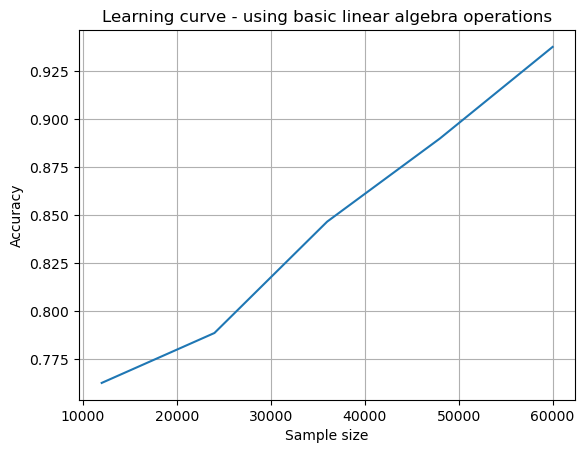

Sample size:  12000 Test error:  tensor(0.2372)
Sample size:  24000 Test error:  tensor(0.2112)
Sample size:  36000 Test error:  tensor(0.1532)
Sample size:  48000 Test error:  tensor(0.1099)
Sample size:  60000 Test error:  tensor(0.0622)


In [48]:
sample_size_int = 12000
sample_size_step = 12000
sample_sizes = []
accuracies = []
test_errors = []
for sample_size in range(sample_size_int, Y_train.shape[0]+1, sample_size_step):
    sample_sizes.append(sample_size)
    print("Sample size: ", sample_size)
    random_indices = torch.randperm(Y_train.shape[0])[:sample_size]
    X_train_sample = X_train[random_indices, :] ##shape (sample_size, 784) - random sampling
    Y_train_sample = Y_train[random_indices, :] ##shape (sample_size, 10) - random sampling
    ##TRAINING
    W1, W2, W3 = initialize_weights (random_uniform = "Yes")
    W1, W2, W3 = train(X_train_sample, Y_train_sample, W1, W2, W3, learning_rate=0.005, num_epochs=75, batch_size = 16)
    ##TESTING
    loss, acc = test(X_test, Y_test, W1, W2, W3)
    accuracies.append(acc)
    test_errors.append(1-acc)


##LEARNING CURVE
fig, ax = plt.subplots()
ax.plot(sample_sizes, accuracies)
ax.set(xlabel='Sample size', ylabel='Accuracy', title='Learning curve - using basic linear algebra operations')
ax.grid()
plt.show()

##REPORTING TEST ERRORS
for i in range(len(test_errors)):
    print("Sample size: ", sample_sizes[i], "Test error: ", test_errors[i])


In [49]:
print(sample_sizes, accuracies)

[12000, 24000, 36000, 48000, 60000] [tensor(0.7628), tensor(0.7888), tensor(0.8468), tensor(0.8901), tensor(0.9378)]


**Problem 3.3 - Three Layer Neural Network using Pytorch Modules**

Sample size:  12000
Epoch:  0  Loss:  2.332613706588745  Train accuracy:  tensor(0.0625)
Epoch:  5  Loss:  2.3179328441619873  Train accuracy:  tensor(0.0625)
Epoch:  10  Loss:  2.2752373218536377  Train accuracy:  tensor(0.1875)
Epoch:  15  Loss:  2.0328190326690674  Train accuracy:  tensor(0.3125)
Epoch:  20  Loss:  1.461808443069458  Train accuracy:  tensor(0.5625)
Epoch:  25  Loss:  1.1305675506591797  Train accuracy:  tensor(0.6875)
Epoch:  30  Loss:  0.9370383620262146  Train accuracy:  tensor(0.7500)
Epoch:  35  Loss:  0.787188708782196  Train accuracy:  tensor(0.7500)
Epoch:  40  Loss:  0.6731209754943848  Train accuracy:  tensor(0.8750)
Epoch:  45  Loss:  0.5822843909263611  Train accuracy:  tensor(0.8750)
py_sample_size 12000 Test accuracy:  tensor(0.8574)
Sample size:  24000
Epoch:  0  Loss:  2.291520833969116  Train accuracy:  tensor(0.0625)
Epoch:  5  Loss:  2.1965017318725586  Train accuracy:  tensor(0.3750)
Epoch:  10  Loss:  1.1689742803573608  Train accuracy:  tensor(0

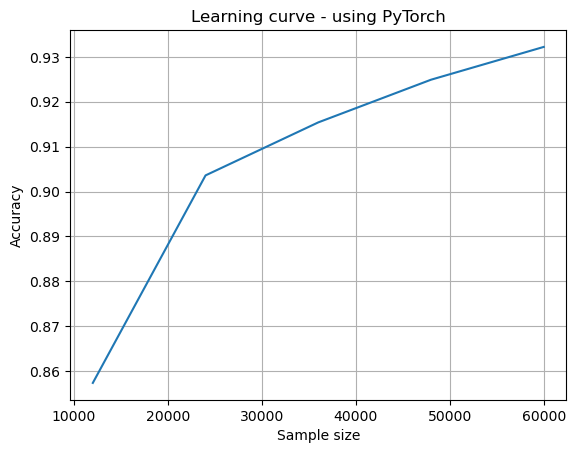

Sample size:  12000 Test error:  tensor(0.1426)
Sample size:  24000 Test error:  tensor(0.0964)
Sample size:  36000 Test error:  tensor(0.0846)
Sample size:  48000 Test error:  tensor(0.0751)
Sample size:  60000 Test error:  tensor(0.0678)


In [50]:
class ThreeNN(nn.Module):
    def __init__(self):
        super(ThreeNN, self).__init__()
        self.fc1 = nn.Linear(784, 300, bias=False)
        self.fc2 = nn.Linear(300, 200, bias=False)
        self.fc3 = nn.Linear(200, 10, bias=False) ##k = 10 (MNIST classes size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x) ##since nn.CrossEntropyLoss() applies softmax internally
        return x
    

##TRAINING
py_epochs = 50
py_batch_size = 16
py_sample_size_int = 12000
py_sample_size_step = 12000
py_sample_sizes = []
py_accuracies = []
py_test_errors = []
for py_sample_size in range(py_sample_size_int, Y_train.shape[0]+1, py_sample_size_step):
    py_sample_sizes.append(py_sample_size)
    print("Sample size: ", py_sample_size)
    random_indices = torch.randperm(Y_train.shape[0])[:py_sample_size]
    py_X_train_sample = X_train[random_indices, :] ##shape (sample_size, 784) - random sampling
    py_Y_train_sample = Y_train[random_indices, :] ##shape (sample_size, 10) - random sampling
    py_model = ThreeNN()
    optimizer = optim.SGD(py_model.parameters(), lr=0.005)
    py_loss = nn.CrossEntropyLoss()
    for epoch in range(py_epochs):
        py_num_batches = (py_X_train_sample.shape[0] + py_batch_size - 1) // py_batch_size
        for i in range(py_num_batches):
            optimizer.zero_grad()
            py_min_index = i * py_batch_size
            py_max_index = min((i + 1) * py_batch_size, py_X_train_sample.shape[0])
            X_batch = py_X_train_sample[py_min_index:py_max_index, :]
            Y_batch = py_Y_train_sample[py_min_index:py_max_index, :]
            Y_pred = py_model(X_batch)
            loss = py_loss(Y_pred, torch.argmax(Y_batch, dim=1))
            loss.backward()
            optimizer.step()
        if epoch % 5 == 0:
            train_accuracy = (torch.argmax(Y_pred, dim=1) == torch.argmax(Y_batch, dim=1)).float().mean() ##accuracy before recent weight update
            print("Epoch: ", epoch, " Loss: ", loss.item(), " Train accuracy: ", train_accuracy) 
            #learning_rate = learning_rate * 0.95  ##decreasing learning rate by 5% every 5 epochs

        

    ##TESTING
    py_Y_pred = py_model(X_test)
    py_accuracy = (torch.argmax(py_Y_pred, dim=1) == torch.argmax(Y_test, dim=1)).float().mean()
    py_accuracies.append(py_accuracy)
    py_test_errors.append(1-py_accuracy)
    print("py_sample_size", py_sample_size, "Test accuracy: ", py_accuracy)

##LEARNING CURVE
fig, ax = plt.subplots()
ax.plot(py_sample_sizes, py_accuracies)
ax.set(xlabel='Sample size', ylabel='Accuracy', title='Learning curve - using PyTorch')
ax.grid()
plt.show()

##REPORTING TEST ERRORS
for i in range(len(py_test_errors)):
    print("Sample size: ", py_sample_sizes[i], "Test error: ", py_test_errors[i])



    

**Problem 3.4.1 - Weight Initialization - Zeros**

Sample size:  12000
Epoch:  0  Loss:  2.3118433952331543  Train accuracy:  tensor(0.)
Epoch:  5  Loss:  2.3116819858551025  Train accuracy:  tensor(0.)
Epoch:  10  Loss:  2.3115131855010986  Train accuracy:  tensor(0.)
Epoch:  15  Loss:  2.3113369941711426  Train accuracy:  tensor(0.)
Epoch:  20  Loss:  2.3111541271209717  Train accuracy:  tensor(0.)
Epoch:  25  Loss:  2.310962677001953  Train accuracy:  tensor(0.)
Epoch:  30  Loss:  2.3107638359069824  Train accuracy:  tensor(0.)
Epoch:  35  Loss:  2.3105573654174805  Train accuracy:  tensor(0.)
Epoch:  40  Loss:  2.310342788696289  Train accuracy:  tensor(0.)
Epoch:  45  Loss:  2.3101208209991455  Train accuracy:  tensor(0.)
py_sample_size 12000 Test accuracy:  tensor(0.1010)
Sample size:  24000
Epoch:  0  Loss:  2.2780251502990723  Train accuracy:  tensor(0.0625)
Epoch:  5  Loss:  2.278627872467041  Train accuracy:  tensor(0.0625)
Epoch:  10  Loss:  2.2792470455169678  Train accuracy:  tensor(0.0625)
Epoch:  15  Loss:  2.27988290786

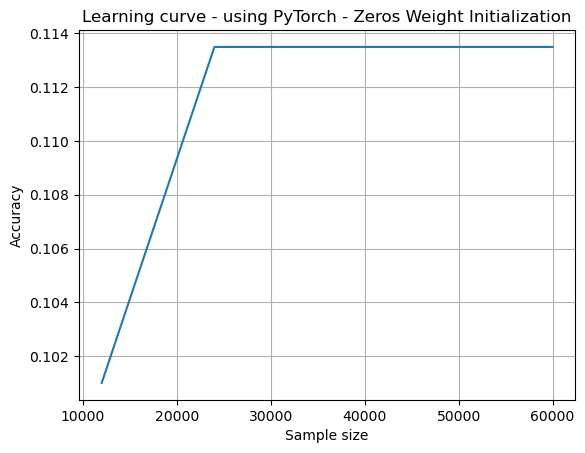

Sample size:  12000 Test error (zero weights):  tensor(0.8990)
Sample size:  24000 Test error (zero weights):  tensor(0.8865)
Sample size:  36000 Test error (zero weights):  tensor(0.8865)
Sample size:  48000 Test error (zero weights):  tensor(0.8865)
Sample size:  60000 Test error (zero weights):  tensor(0.8865)


In [51]:
class ThreeNN(nn.Module):
    def __init__(self):
        super(ThreeNN, self).__init__()
        self.fc1 = nn.Linear(784, 300, bias=False)
        nn.init.zeros_(self.fc1.weight) ##initializing weights to zero
        self.fc2 = nn.Linear(300, 200, bias=False)
        nn.init.zeros_(self.fc2.weight)
        self.fc3 = nn.Linear(200, 10, bias=False) ##k = 10 (MNIST classes size)
        nn.init.zeros_(self.fc3.weight)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x) ##since nn.CrossEntropyLoss() applies softmax internally
        return x
    

##TRAINING
py_epochs = 50
py_batch_size = 16
py_sample_size_int = 12000
py_sample_size_step = 12000
py_sample_sizes = []
py_accuracies = []
py_test_errors = []
for py_sample_size in range(py_sample_size_int, Y_train.shape[0]+1, py_sample_size_step):
    py_sample_sizes.append(py_sample_size)
    print("Sample size: ", py_sample_size)
    random_indices = torch.randperm(Y_train.shape[0])[:py_sample_size]
    py_X_train_sample = X_train[random_indices, :] ##shape (sample_size, 784) - random sampling
    py_Y_train_sample = Y_train[random_indices, :] ##shape (sample_size, 10) - random sampling
    py_model = ThreeNN()
    optimizer = optim.SGD(py_model.parameters(), lr=0.005)
    py_loss = nn.CrossEntropyLoss()
    for epoch in range(py_epochs):
        py_num_batches = (py_X_train_sample.shape[0] + py_batch_size - 1) // py_batch_size
        for i in range(py_num_batches):
            optimizer.zero_grad()
            py_min_index = i * py_batch_size
            py_max_index = min((i + 1) * py_batch_size, py_X_train_sample.shape[0])
            X_batch = py_X_train_sample[py_min_index:py_max_index, :]
            Y_batch = py_Y_train_sample[py_min_index:py_max_index, :]
            Y_pred = py_model(X_batch)
            loss = py_loss(Y_pred, torch.argmax(Y_batch, dim=1))
            loss.backward()
            optimizer.step()
        if epoch % 5 == 0:
            train_accuracy = (torch.argmax(Y_pred, dim=1) == torch.argmax(Y_batch, dim=1)).float().mean() ##accuracy before recent weight update
            print("Epoch: ", epoch, " Loss: ", loss.item(), " Train accuracy: ", train_accuracy) 
            #learning_rate = learning_rate * 0.95  ##decreasing learning rate by 5% every 5 epochs

        

    ##TESTING
    py_Y_pred = py_model(X_test)
    py_accuracy = (torch.argmax(py_Y_pred, dim=1) == torch.argmax(Y_test, dim=1)).float().mean()
    py_accuracies.append(py_accuracy)
    py_test_errors.append(1-py_accuracy)
    print("py_sample_size", py_sample_size, "Test accuracy: ", py_accuracy)

##LEARNING CURVE
fig, ax = plt.subplots()
ax.plot(py_sample_sizes, py_accuracies)
ax.set(xlabel='Sample size', ylabel='Accuracy', title='Learning curve - using PyTorch - Zeros Weight Initialization')
ax.grid()
plt.show()

##REPORTING TEST ERRORS
for i in range(len(py_test_errors)):
    print("Sample size: ", py_sample_sizes[i], "Test error (zero weights): ", py_test_errors[i])



    

**Problem 3.4.2 - Weight Initialization - Random (-1, 1)**

Sample size:  12000
Epoch:  0  Loss:  1.4341623783111572  Train accuracy:  tensor(0.5000)
Epoch:  5  Loss:  0.1729070544242859  Train accuracy:  tensor(1.)
Epoch:  10  Loss:  0.08376036584377289  Train accuracy:  tensor(1.)
Epoch:  15  Loss:  0.06239282712340355  Train accuracy:  tensor(1.)
Epoch:  20  Loss:  0.05198647826910019  Train accuracy:  tensor(1.)
Epoch:  25  Loss:  0.04496181756258011  Train accuracy:  tensor(1.)
Epoch:  30  Loss:  0.03972464054822922  Train accuracy:  tensor(1.)
Epoch:  35  Loss:  0.03566273674368858  Train accuracy:  tensor(1.)
Epoch:  40  Loss:  0.03239136189222336  Train accuracy:  tensor(1.)
Epoch:  45  Loss:  0.02965928055346012  Train accuracy:  tensor(1.)
py_sample_size 12000 Test accuracy:  tensor(0.8945)
Sample size:  24000
Epoch:  0  Loss:  0.560257613658905  Train accuracy:  tensor(0.8125)
Epoch:  5  Loss:  0.1505955159664154  Train accuracy:  tensor(1.)
Epoch:  10  Loss:  0.11294380575418472  Train accuracy:  tensor(1.)
Epoch:  15  Loss:  0.0976

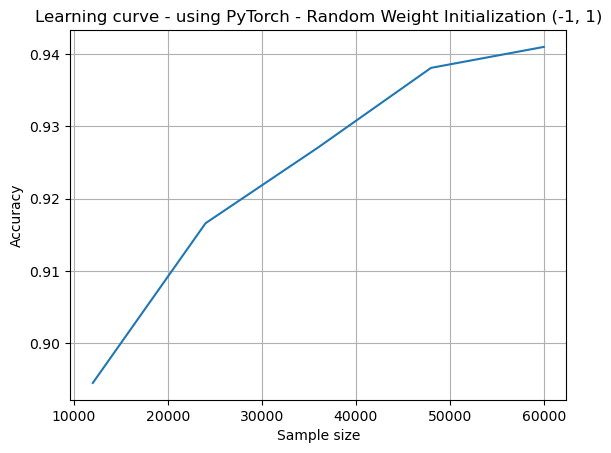

Sample size:  12000 Test error ((-1, 1) weights):  tensor(0.1055)
Sample size:  24000 Test error ((-1, 1) weights):  tensor(0.0834)
Sample size:  36000 Test error ((-1, 1) weights):  tensor(0.0729)
Sample size:  48000 Test error ((-1, 1) weights):  tensor(0.0619)
Sample size:  60000 Test error ((-1, 1) weights):  tensor(0.0590)


In [52]:
class ThreeNN(nn.Module):
    def __init__(self):
        super(ThreeNN, self).__init__()
        self.fc1 = nn.Linear(784, 300, bias=False)
        nn.init.uniform_(self.fc1.weight, -1, 1) ##initializing weights to random values between -1 and 1
        self.fc2 = nn.Linear(300, 200, bias=False)
        nn.init.uniform_(self.fc2.weight, -1, 1)
        self.fc3 = nn.Linear(200, 10, bias=False) ##k = 10 (MNIST classes size)
        nn.init.uniform_(self.fc3.weight, -1, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x) ##since nn.CrossEntropyLoss() applies softmax internally
        return x
    

##TRAINING
py_epochs = 50
py_batch_size = 16
py_sample_size_int = 12000
py_sample_size_step = 12000
py_sample_sizes = []
py_accuracies = []
py_test_errors = []
for py_sample_size in range(py_sample_size_int, Y_train.shape[0]+1, py_sample_size_step):
    py_sample_sizes.append(py_sample_size)
    print("Sample size: ", py_sample_size)
    random_indices = torch.randperm(Y_train.shape[0])[:py_sample_size]
    py_X_train_sample = X_train[random_indices, :] ##shape (sample_size, 784) - random sampling
    py_Y_train_sample = Y_train[random_indices, :] ##shape (sample_size, 10) - random sampling
    py_model = ThreeNN()
    optimizer = optim.SGD(py_model.parameters(), lr=0.005)
    py_loss = nn.CrossEntropyLoss()
    for epoch in range(py_epochs):
        py_num_batches = (py_X_train_sample.shape[0] + py_batch_size - 1) // py_batch_size
        for i in range(py_num_batches):
            optimizer.zero_grad()
            py_min_index = i * py_batch_size
            py_max_index = min((i + 1) * py_batch_size, py_X_train_sample.shape[0])
            X_batch = py_X_train_sample[py_min_index:py_max_index, :]
            Y_batch = py_Y_train_sample[py_min_index:py_max_index, :]
            Y_pred = py_model(X_batch)
            loss = py_loss(Y_pred, torch.argmax(Y_batch, dim=1))
            loss.backward()
            optimizer.step()
        if epoch % 5 == 0:
            train_accuracy = (torch.argmax(Y_pred, dim=1) == torch.argmax(Y_batch, dim=1)).float().mean() ##accuracy before recent weight update
            print("Epoch: ", epoch, " Loss: ", loss.item(), " Train accuracy: ", train_accuracy) 
            #learning_rate = learning_rate * 0.95  ##decreasing learning rate by 5% every 5 epochs

        

    ##TESTING
    py_Y_pred = py_model(X_test)
    py_accuracy = (torch.argmax(py_Y_pred, dim=1) == torch.argmax(Y_test, dim=1)).float().mean()
    py_accuracies.append(py_accuracy)
    py_test_errors.append(1-py_accuracy)
    print("py_sample_size", py_sample_size, "Test accuracy: ", py_accuracy)

##LEARNING CURVE
fig, ax = plt.subplots()
ax.plot(py_sample_sizes, py_accuracies)
ax.set(xlabel='Sample size', ylabel='Accuracy', title='Learning curve - using PyTorch - Random Weight Initialization (-1, 1)')
ax.grid()
plt.show()

##REPORTING TEST ERRORS
for i in range(len(py_test_errors)):
    print("Sample size: ", py_sample_sizes[i], "Test error ((-1, 1) weights): ", py_test_errors[i])



    

testttt

In [77]:
riya = torch.tensor([[1, 4, 5], [4, 5, 1]])
harsha = torch.tensor([[1, 2], [3, 4], [5, 6]])
#print(riya.shape, harsha.shape)
#torch.sum(riya, dim=1, keepdim=True)
torch.sum(harsha)
Y_train.shape

torch.Size([60000])

In [139]:
torch.randperm(5)[:5]

tensor([1, 0, 3, 2, 4])

In [138]:
for i in range(7, 49+1, 7):
    print(i)

7
14
21
28
35
42
49
